In [47]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TensorFlow
import tensorflow as tf

# データの分割
from sklearn.model_selection import train_test_split

# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

In [ ]:
# TesorFlowのcifar10のdatasetを使用する（後ほど猫、犬の画像のみにする）
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [49]:
# X_train, Y_train, X_test, Y_testの形状を確認
print("X_train=", X_train.shape)
print("Y_train=", Y_train.shape)
print("X_test=", X_test.shape)
print("Y_test=", Y_test.shape)

X_train= (50000, 32, 32, 3)
Y_train= (50000, 1)
X_test= (10000, 32, 32, 3)
Y_test= (10000, 1)


In [50]:
# 余計な次元を削除
Y_train = Y_train.squeeze()
Y_test = Y_test.squeeze()

In [51]:
# X_train, Y_train, X_test, Y_testの形状を再び確認
print("X_train=", X_train.shape)
print("Y_train=", Y_train.shape)
print("X_test=", X_test.shape)
print("Y_test=", Y_test.shape)

X_train= (50000, 32, 32, 3)
Y_train= (50000,)
X_test= (10000, 32, 32, 3)
Y_test= (10000,)


In [97]:
# 猫と犬のラベル
cat_label = 3
dog_label = 5

train_cat_dog_indices = np.where((Y_train == cat_label) | (Y_train == dog_label))[0]
X_train_cat_dog = X_train[train_cat_dog_indices]
Y_train_cat_dog = Y_train[train_cat_dog_indices]

test_cat_dog_indices = np.where((Y_test == cat_label) | (Y_test == dog_label))[0]
X_test_cat_dog = X_test[test_cat_dog_indices]
Y_test_cat_dog = Y_test[test_cat_dog_indices]

# ラベルを0(猫)、1(犬)に変更
Y_train_cat_dog = (Y_train_cat_dog == dog_label).astype(int)
Y_test_cat_dog = (Y_test_cat_dog == dog_label).astype(int)

In [98]:
# 先頭1行を表示
print(X_train_cat_dog[0])
print(Y_train_cat_dog[0])

[[[125 125 116]
  [110 101  91]
  [102  90  83]
  ...
  [202 207 214]
  [200 205 212]
  [202 208 214]]

 [[142 146 142]
  [146 144 139]
  [176 172 170]
  ...
  [195 201 205]
  [198 205 209]
  [204 211 215]]

 [[180 185 183]
  [143 146 146]
  [156 157 157]
  ...
  [122 111 113]
  [139 128 131]
  [158 147 150]]

 ...

 [[104  82  41]
  [101  80  39]
  [101  81  38]
  ...
  [126 103  67]
  [126 103  69]
  [125 101  68]]

 [[104  81  40]
  [105  84  41]
  [109  88  43]
  ...
  [138 113  78]
  [137 113  80]
  [137 112  81]]

 [[105  83  42]
  [108  87  45]
  [115  94  50]
  ...
  [143 117  82]
  [143 116  84]
  [144 116  86]]]
0


In [99]:
# train_test_splitを使い、学習データと検証データに7:3（検証データが3割）で分割する
X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(X_train_cat_dog, Y_train_cat_dog, test_size=0.3, random_state=0)

X_test2 = X_test_cat_dog
Y_test2 = Y_test_cat_dog

In [100]:
# X_train2, Y_train2, X_valid2, Y_valid2, X_test2, Y_test2の形状を確認
print("X_train2=", X_train2.shape)
print("Y_train2=", Y_train2.shape)
print("X_valid2=", X_valid2.shape)
print("Y_valid2=", Y_valid2.shape)
print("X_test2=", X_test2.shape)
print("Y_test2=", Y_test2.shape)

X_train2= (7000, 32, 32, 3)
Y_train2= (7000,)
X_valid2= (3000, 32, 32, 3)
Y_valid2= (3000,)
X_test2= (2000, 32, 32, 3)
Y_test2= (2000,)


In [118]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(32, 32, 3)),

    # 畳み込みブロック
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    # 全結合層
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # 出力層
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# モデルの構築
model.compile(optimizer = "rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

In [120]:
# モデルの構造を表示
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,196,225 (16.01 MB)

 Trainable params: 4,196,225 (16.01 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
%%time
# 学習の実施
log = model.fit(X_train2, Y_train2, epochs=50, batch_size=64, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=20,
                                                            verbose=1)],
                validation_data=(X_valid2, Y_valid2))

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5091 - loss: 57.6438 - val_accuracy: 0.5010 - val_loss: 0.6882
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5183 - loss: 1.1063 - val_accuracy: 0.6053 - val_loss: 0.6595
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6049 - loss: 0.6905 - val_accuracy: 0.5860 - val_loss: 0.7003
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6687 - loss: 0.6351 - val_accuracy: 0.5750 - val_loss: 0.7279
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7366 - loss: 0.5516 - val_accuracy: 0.6537 - val_loss: 0.6565
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7890 - loss: 0.4640 - val_accuracy: 0.6470 - val_loss: 0.8065
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8469 - loss: 0.3689 - val_accuracy: 0.6637 - val_loss: 0.8021
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9013 - loss: 0.2580 - val_acc

Text(0, 0.5, 'crossentropy')

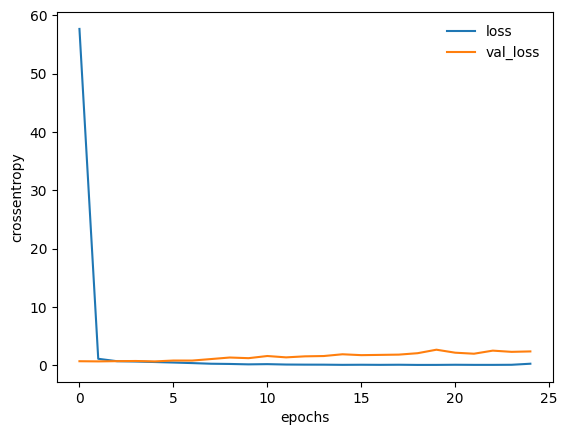

In [122]:
# 学習過程をグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

In [ ]:
Y_prob2 = model.predict(X_test2)
# 0,1に変換
Y_pred2 = (Y_prob2 >= 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[0.99999076]


In [135]:
# classification_reportを使い、モデルの評価を実施
from sklearn.metrics import classification_report

print(classification_report(Y_test2, Y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63      1000
           1       0.64      0.73      0.68      1000

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.65      2000
weighted avg       0.66      0.66      0.65      2000

